In [44]:
import os
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')


# Dataset: Reading and Understanding

In [3]:
filepath= os.path.join(os.pardir, 'dataset', 'food_delivery.csv')
df = pd.read_csv(filepath)
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [4]:
df.shape

(45584, 20)

In [5]:
df.dtypes

ID                              object
Delivery_person_ID              object
Delivery_person_Age            float64
Delivery_person_Ratings        float64
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Order_Date                      object
Time_Orderd                     object
Time_Order_picked               object
Weather_conditions              object
Road_traffic_density            object
Vehicle_condition                int64
Type_of_order                   object
Type_of_vehicle                 object
multiple_deliveries            float64
Festival                        object
City                            object
Time_taken (min)                 int64
dtype: object

In [8]:
for i in df.select_dtypes(np.object).columns:
    print(i.upper())
    print(df[i].nunique())
    print()

ID
45584

DELIVERY_PERSON_ID
1320

ORDER_DATE
44

TIME_ORDERD
176

TIME_ORDER_PICKED
193

WEATHER_CONDITIONS
6

ROAD_TRAFFIC_DENSITY
4

TYPE_OF_ORDER
4

TYPE_OF_VEHICLE
4

FESTIVAL
2

CITY
3



#### Null values

In [30]:
df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [34]:
df.dropna().shape

(41359, 20)

In [13]:
df.Time_Orderd.map(lambda x : datetime.datetime.strptime(x,'%H:%M'))

ValueError: time data '0.458333333' does not match format '%H:%M'

In [33]:
(df[df['Time_Orderd'].map(lambda x: len(str(x)))>5].shape, 
df[df['Time_Order_picked'].map(lambda x: len(str(x)))>5].shape,
df[(df['Time_Orderd'].map(lambda x: len(str(x)))>5) | (df['Time_Order_picked'].map(lambda x: len(str(x)))>5)].shape)

((2375, 20), (3240, 20), (5615, 20))

In [41]:
df[~((df['Time_Orderd'].map(lambda x: len(str(x)))>5) | (df['Time_Order_picked'].map(lambda x: len(str(x)))>5))].dropna().drop_duplicates().shape

(36193, 20)

In [40]:
36193/45584*100

79.39847314847314

In [42]:
df['Vehicle_condition'] = df.Vehicle_condition.astype(str)

# Univariate Analysis

#### Numeric Variables

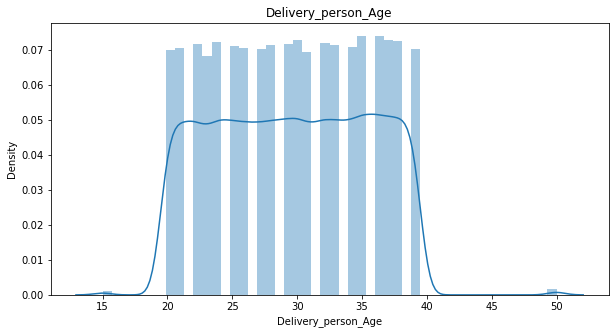

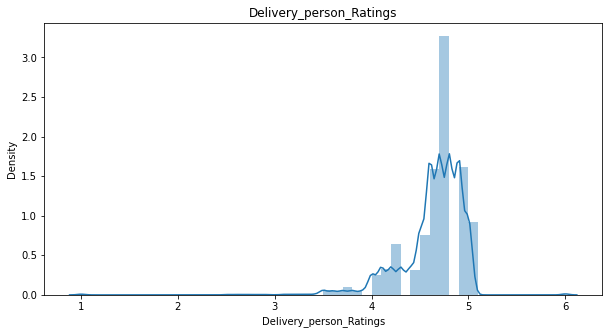

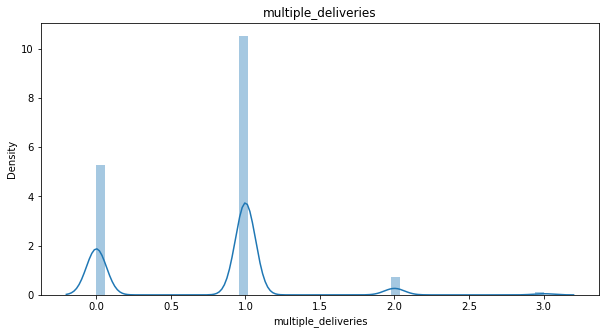

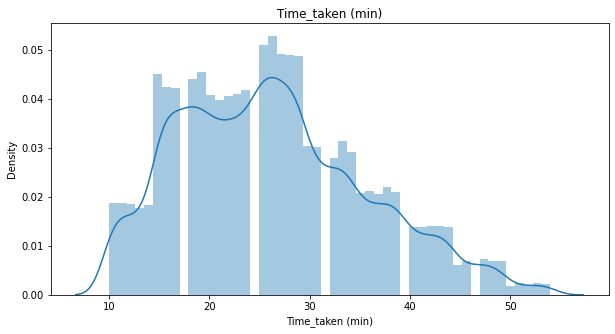

In [49]:
for i in df.select_dtypes(np.number).drop(['Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude'], 1).columns:
    plt.figure(figsize=(10,5))
    plt.title(i)
    sns.distplot(df[i])
    plt.show()

#### Categorical

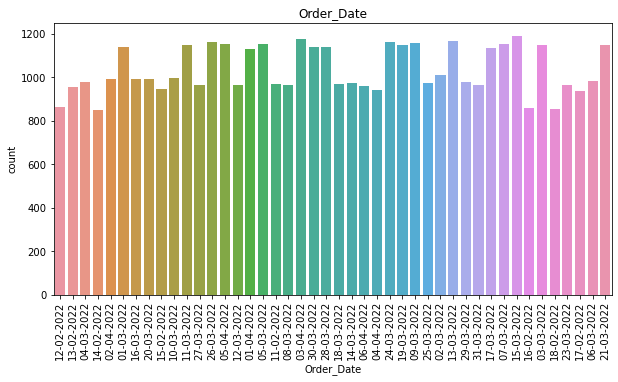

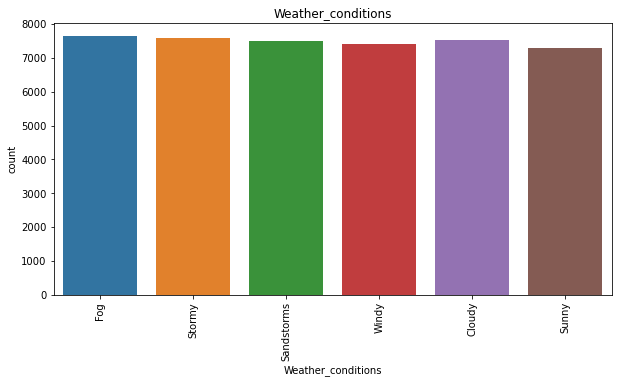

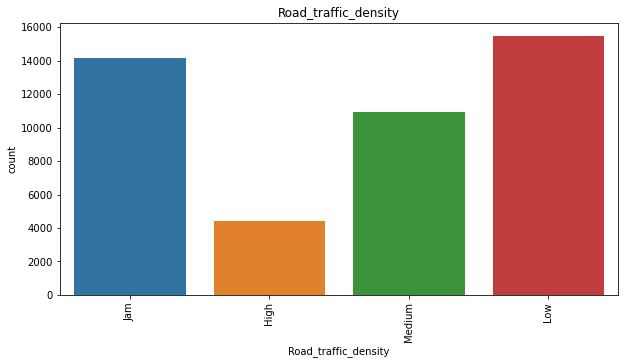

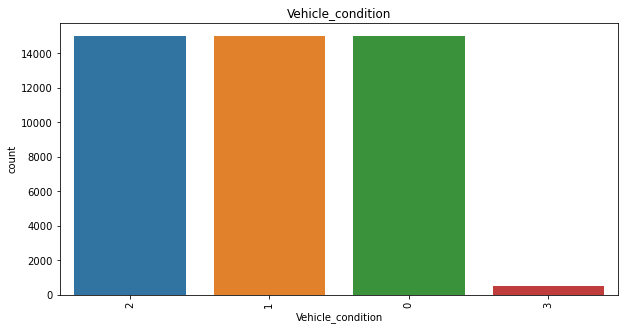

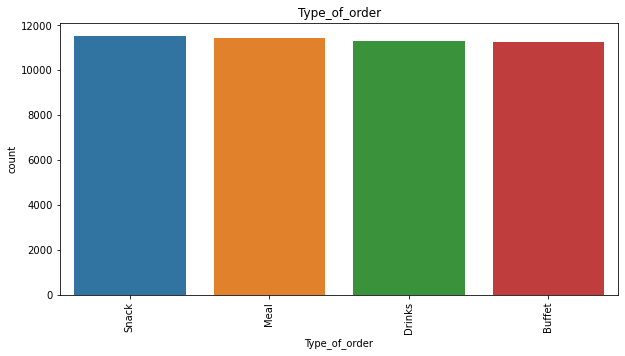

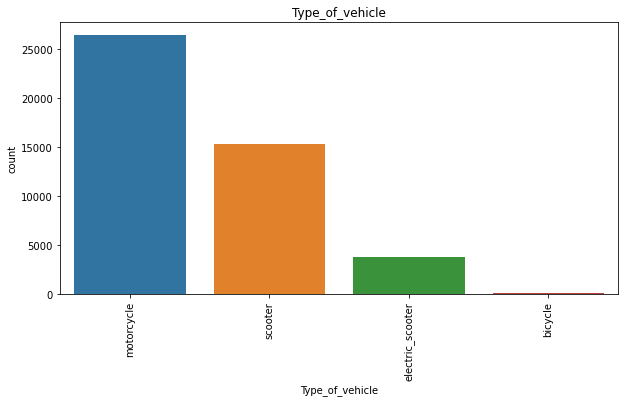

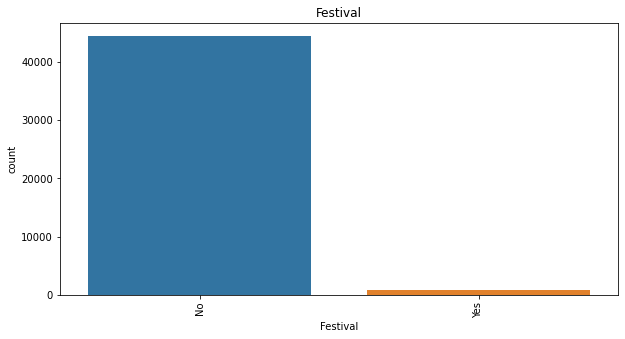

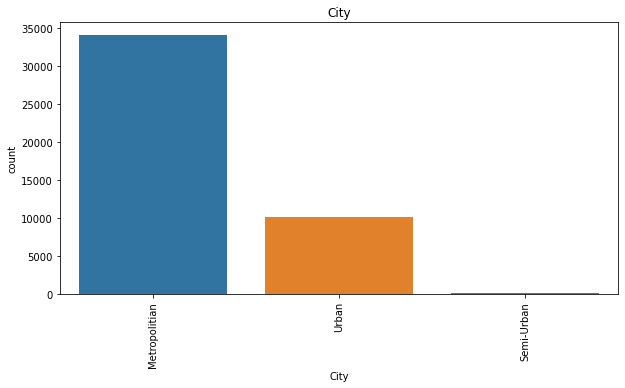

In [56]:
for i in df.select_dtypes(np.object).drop(['ID', 'Delivery_person_ID','Time_Order_picked', 'Time_Orderd'], 1).columns:
    plt.figure(figsize=(10,5))
    plt.title(i)
    sns.countplot(df[i])
    plt.xticks(rotation=90)
    plt.show()

# Bivariate Analysis

#### Numeric

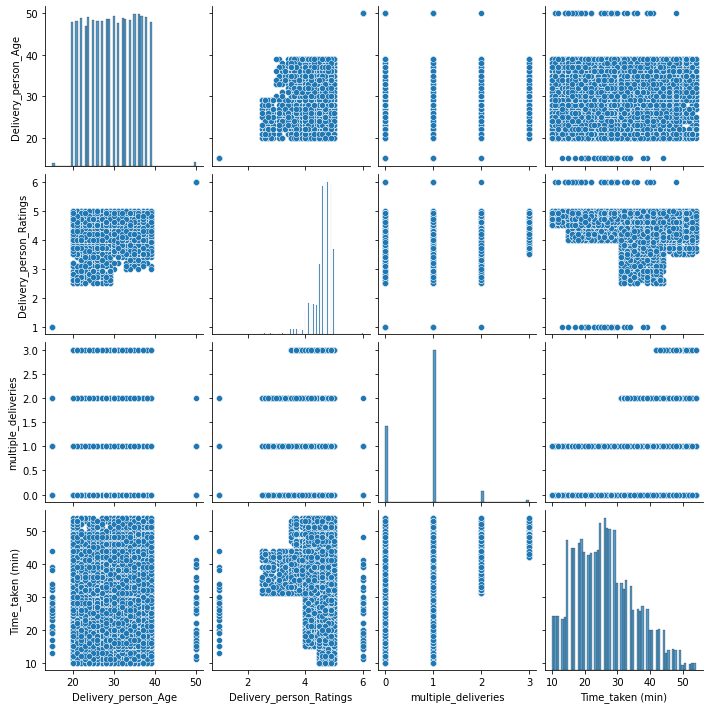

In [74]:
sns.pairplot(df.select_dtypes(np.number).drop(['Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude'], 1))
plt.show()

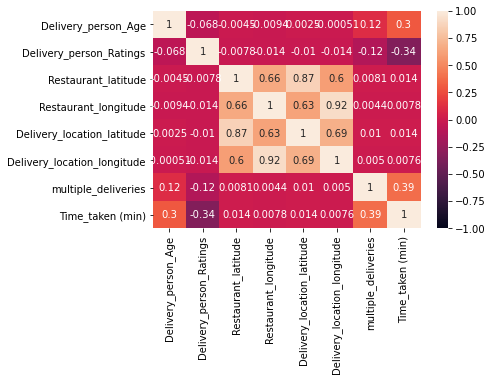

In [73]:
sns.heatmap(df.corr(), vmax = 1, vmin = -1, annot = True)
plt.show()

#### Geographical

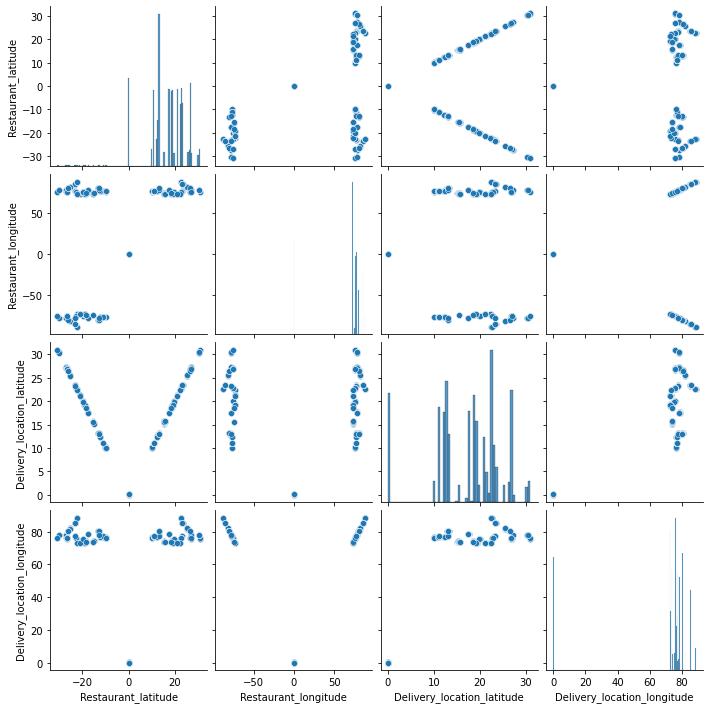

In [75]:
sns.pairplot(df[['Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude']])
plt.show()

#### Categorical

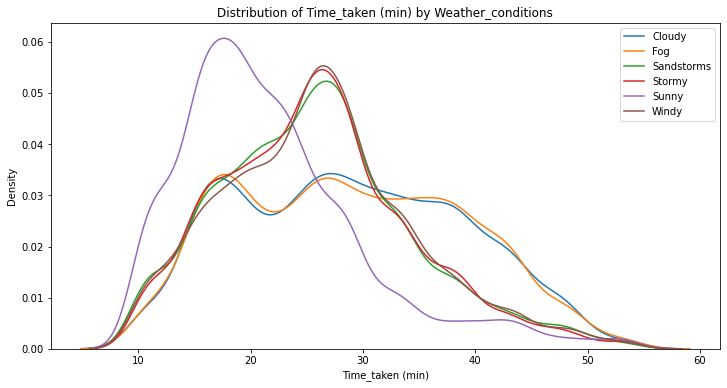

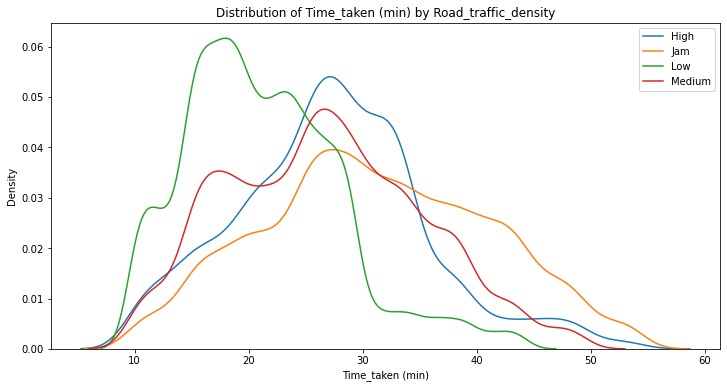

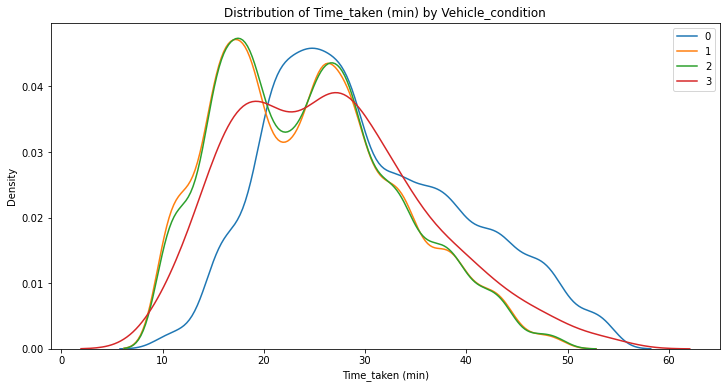

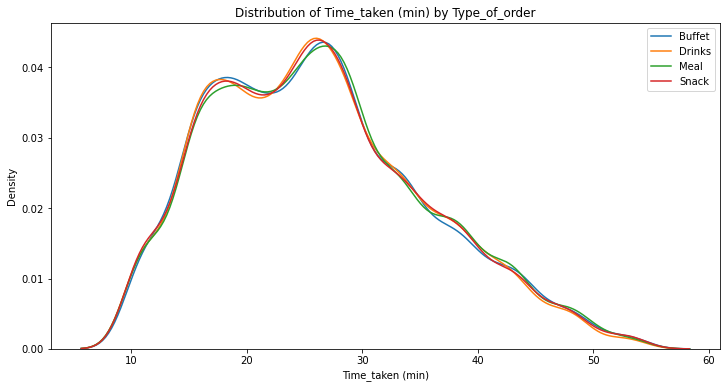

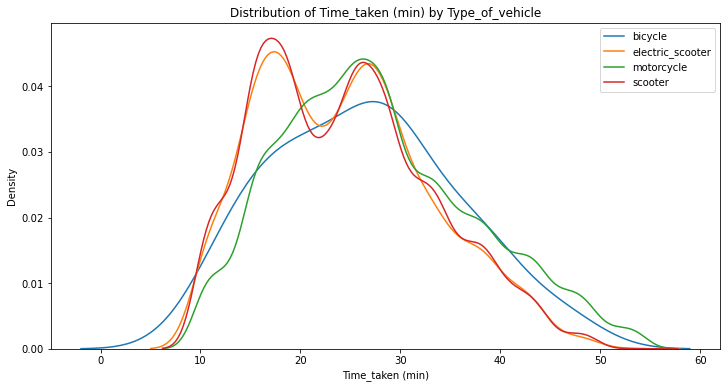

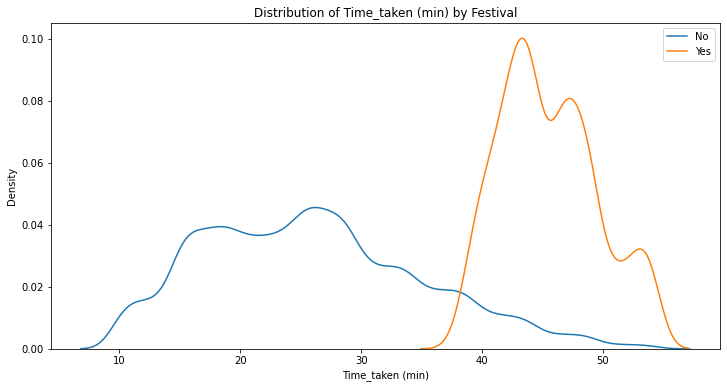

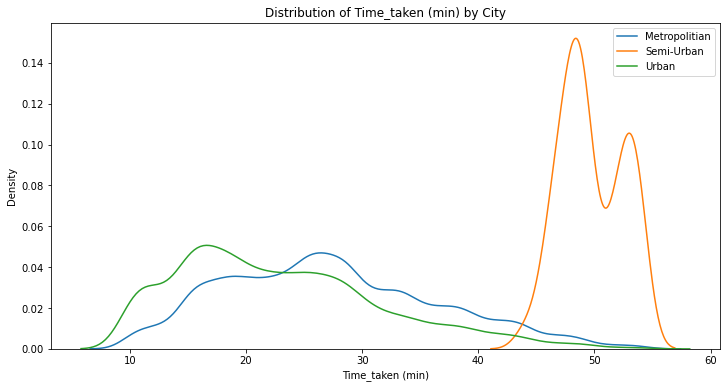

In [71]:
for col in df.select_dtypes(np.object).drop(['ID', 'Delivery_person_ID', 'Order_Date','Time_Order_picked', 'Time_Orderd'], 1).columns:
    # Group the data by the current categorical column
    grouped = df.groupby(col)
    
    # Create a figure and axis for the chart
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Loop over each group in the grouped data and plot a distribution
    # for the 'Time_taken (min)' column
    for group_name, group_data in grouped:
        sns.distplot(group_data['Time_taken (min)'], hist=False, kde=True, label=group_name, ax=ax)
    
    # Set the chart title and axis labels
    ax.set_title(f"Distribution of Time_taken (min) by {col}")
    ax.set_xlabel("Time_taken (min)")
    ax.set_ylabel("Density")
    
    # Add a legend to the chart
    ax.legend()
    
    plt.show()
